In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import nltk library
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
stop_words = nltk.corpus.stopwords.words('english')

# import necessary libraries for text preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
# load the data
df = pd.read_csv('../data/df_file.csv')
df.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [3]:
# check the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [4]:
# the data contains 2 columns, one with the Text data and the other with the predefined labels

In [5]:
# check the distribution of the labels
df['Label'].value_counts()

1    511
4    510
0    417
2    401
3    386
Name: Label, dtype: int64

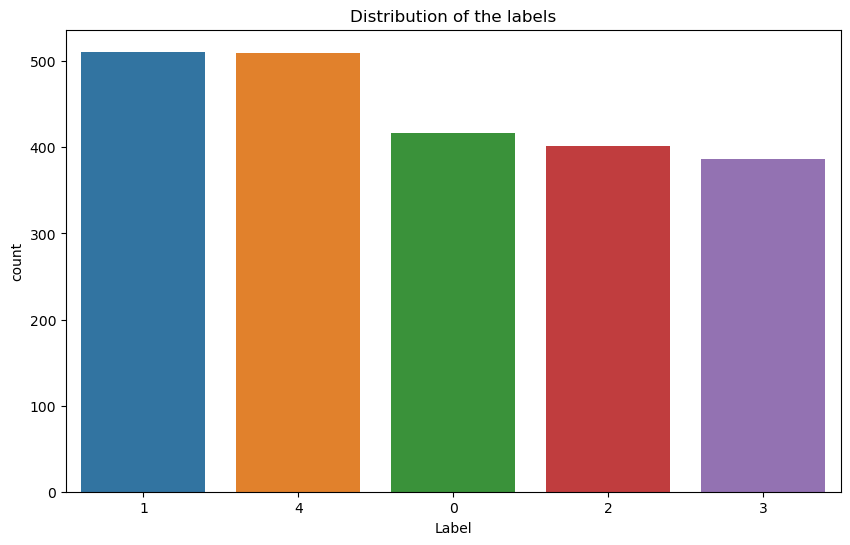

In [6]:
# plot the distribution of the labels sorted by the label
plt.figure(figsize=(10,6))
sns.countplot(x='Label', data=df, order = df['Label'].value_counts().index)
plt.title('Distribution of the labels')
plt.show()

In [7]:
# explore the text data
print(df['Text'][0])

Budget to set scene for election
 
 Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.
 
 Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.
 
 - Increase in the stamp duty threshold from Â£60,000 
  - A freeze on petrol duty 
  - An extension of tax credit scheme for poorer families 
  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chanc

In [8]:
# function to tokenize text
def token_pro(text):
    if pd.notna(text):  # Check if the text is not NaN
        tokens = word_tokenize(text) # Tokenize the text
        tokens = [word.lower() for word in tokens]  # Convert to lowercase
        tokens = [word.strip() for word in tokens]  # Remove whitespaces
        tokens = [word for word in tokens if word.isalnum()]  # Filter out non-alphanumeric words
        tokens = [word for word in tokens if not word in stop_words]  # Remove stopwords
        return tokens
    else:
        return []  # Return an empty list for NaN values

In [9]:
# apply the tokenization function to the text column
df['tokens'] = df['Text'].apply(token_pro)

# check the first 5 rows of the dataframe
df.head()

,Text,Label,tokens
0,Budget to set scene for election\n \n Gordon B...,0,"[budget, set, scene, election, gordon, brown, ..."
1,Army chiefs in regiments decision\n \n Militar...,0,"[army, chiefs, regiments, decision, military, ..."
2,Howard denies split over ID cards\n \n Michael...,0,"[howard, denies, split, id, cards, michael, ho..."
3,Observers to monitor UK election\n \n Minister...,0,"[observers, monitor, uk, election, ministers, ..."
4,Kilroy names election seat target\n \n Ex-chat...,0,"[kilroy, names, election, seat, target, show, ..."


In [10]:
# length of each tokens list
df['tokens_length'] = df['tokens'].apply(len)
df.head()

,Text,Label,tokens,tokens_length
0,Budget to set scene for election\n \n Gordon B...,0,"[budget, set, scene, election, gordon, brown, ...",302
1,Army chiefs in regiments decision\n \n Militar...,0,"[army, chiefs, regiments, decision, military, ...",271
2,Howard denies split over ID cards\n \n Michael...,0,"[howard, denies, split, id, cards, michael, ho...",314
3,Observers to monitor UK election\n \n Minister...,0,"[observers, monitor, uk, election, ministers, ...",299
4,Kilroy names election seat target\n \n Ex-chat...,0,"[kilroy, names, election, seat, target, show, ...",248


In [11]:
# 5 point summary of the tokens length
df.describe()

,Label,tokens_length
count,2225.000000,2225.000000
mean,2.027416,215.217528
std,1.438694,123.636631
min,0.000000,47.000000
25%,1.000000,140.000000
50%,2.000000,189.000000
75%,3.000000,265.000000
max,4.000000,2176.000000


In [12]:
# you can see that the longest text document has 2176 tokens and the shortest has 47 tokens

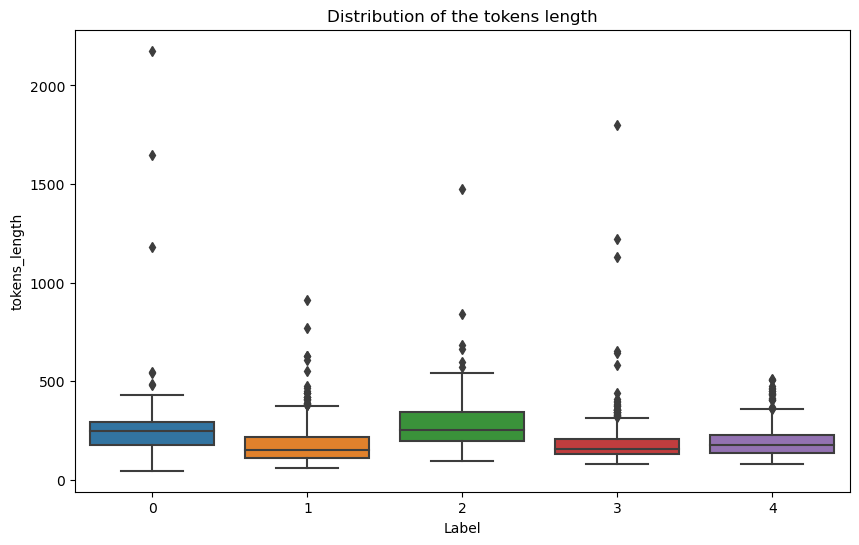

In [13]:
# plot the distribution of the tokens length sorted by the label
plt.figure(figsize=(10,6))
sns.boxplot(x='Label', y='tokens_length', data=df)
plt.title('Distribution of the tokens length')
plt.show()


In [14]:
# create the bag of words with tfidf vectorizer
vec_tfidf = TfidfVectorizer()
X_tfidf = vec_tfidf.fit_transform(df['tokens'].apply(lambda x: ' '.join(x)))
tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vec_tfidf.get_feature_names_out())
tfidf

,000,0001,007,0100,0130,0200,0227,028,03,0300,...,zooms,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# function to plot the most common words in the text data with the tfidf vectorizer
def plot_most_common_words_tfidf(data, vec, top_n=10):
    # get the top n words
    top_words = data.sum().sort_values(ascending=False).head(top_n)
    # define a color palette with neutral colors
    colors = sns.color_palette("Blues_r", n_colors=top_n)
    # plot the top n words with neutral colors
    plt.figure(figsize=(6,4))
    sns.barplot(x=top_words.values, y=top_words.index, palette=colors)
    plt.title('Top {} words in the text data'.format(top_n))
    plt.show()
    return top_words


Label: 0


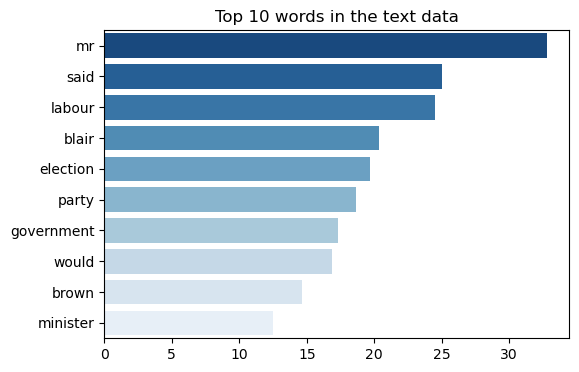

Label: 1


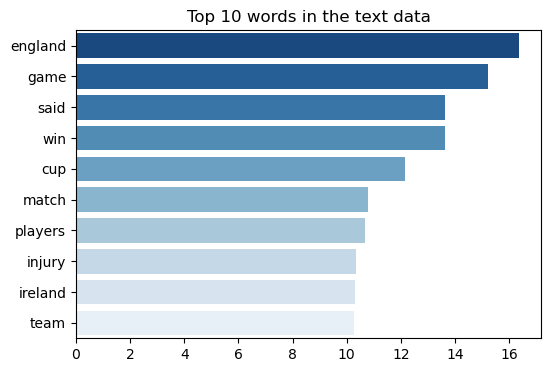

Label: 2


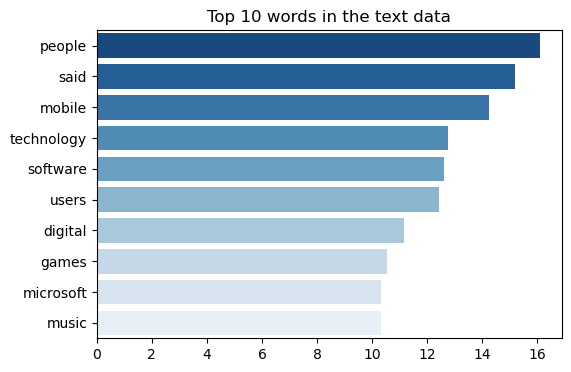

Label: 3


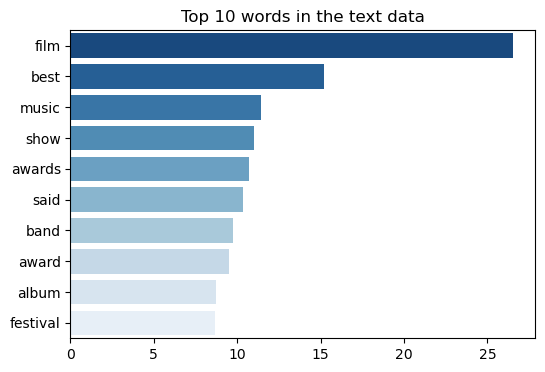

Label: 4


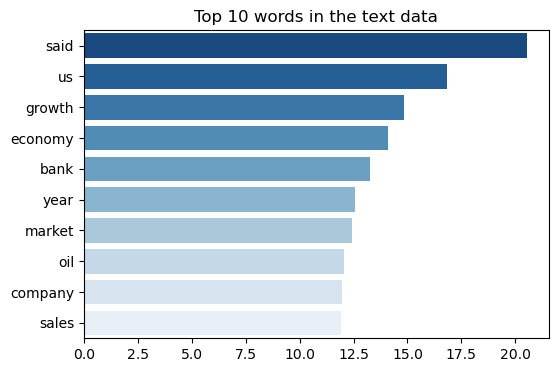

In [16]:
# plot the most common words for each label
for label in df['Label'].unique():
    print('Label:', label)
    plot_most_common_words_tfidf(tfidf[df['Label'] == label], vec_tfidf)

In [17]:
df.head()

,Text,Label,tokens,tokens_length
0,Budget to set scene for election\n \n Gordon B...,0,"[budget, set, scene, election, gordon, brown, ...",302
1,Army chiefs in regiments decision\n \n Militar...,0,"[army, chiefs, regiments, decision, military, ...",271
2,Howard denies split over ID cards\n \n Michael...,0,"[howard, denies, split, id, cards, michael, ho...",314
3,Observers to monitor UK election\n \n Minister...,0,"[observers, monitor, uk, election, ministers, ...",299
4,Kilroy names election seat target\n \n Ex-chat...,0,"[kilroy, names, election, seat, target, show, ...",248


In [49]:
X = X_tfidf
y = df['Label']

In [50]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the shape of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1780, 28278), (445, 28278), (1780,), (445,))

In [51]:
# import classification models from sklearn (Knn, Logistic Regression, Random Forest, and SVM), and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [52]:
from tqdm import tqdm
from tqdm.notebook import trange, tqdm

# import tqdm for progress bar
tqdm.pandas(desc='Running model...')

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from joblib import Parallel, delayed
from tqdm import tqdm
import time

# function to train and evaluate the model, it should record the time taken to train the model and make predictions
# it should also return the accuracy score
def train_evaluate_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Convert sparse matrix to dense numpy arrays
    if hasattr(X_train, 'toarray'):
        X_train = X_train.toarray()
        X_test = X_test.toarray()
    
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end = time.time()
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, end-start

# create a dictionary to store the models and their parameters
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': tree.DecisionTreeClassifier()
}


In [69]:
# perform parallel processing for training and evaluating models
results = Parallel(n_jobs=-1)(delayed(train_evaluate_model)(model, X, y) for model in tqdm(models.values()))

# print the results
for i, model_name in enumerate(models.keys()):
    accuracy, duration = results[i]
    print(f"{model_name} - Accuracy: {accuracy}, Duration: {duration} seconds")

100%|██████████| 7/7 [00:00<00:00, 2759.93it/s]


Logistic Regression - Accuracy: 0.968562874251497, Duration: 13.896958827972412 seconds
Random Forest - Accuracy: 0.9580838323353293, Duration: 10.28417181968689 seconds
SVM - Accuracy: 0.9715568862275449, Duration: 98.27111601829529 seconds
KNN - Accuracy: 0.9191616766467066, Duration: 4.93188214302063 seconds
XGBoost - Accuracy: 0.9505988023952096, Duration: 139.82443618774414 seconds
Naive Bayes - Accuracy: 0.9131736526946108, Duration: 5.7809271812438965 seconds
Decision Tree - Accuracy: 0.8068862275449101, Duration: 8.76455307006836 seconds


In [70]:
# make overall comparison of the models
results_df = pd.DataFrame(results, columns=['Accuracy', 'Duration'], index=models.keys())
results_df

,Accuracy,Duration
Logistic Regression,0.968563,13.896959
Random Forest,0.958084,10.284172
SVM,0.971557,98.271116
KNN,0.919162,4.931882
XGBoost,0.950599,139.824436
Naive Bayes,0.913174,5.780927
Decision Tree,0.806886,8.764553


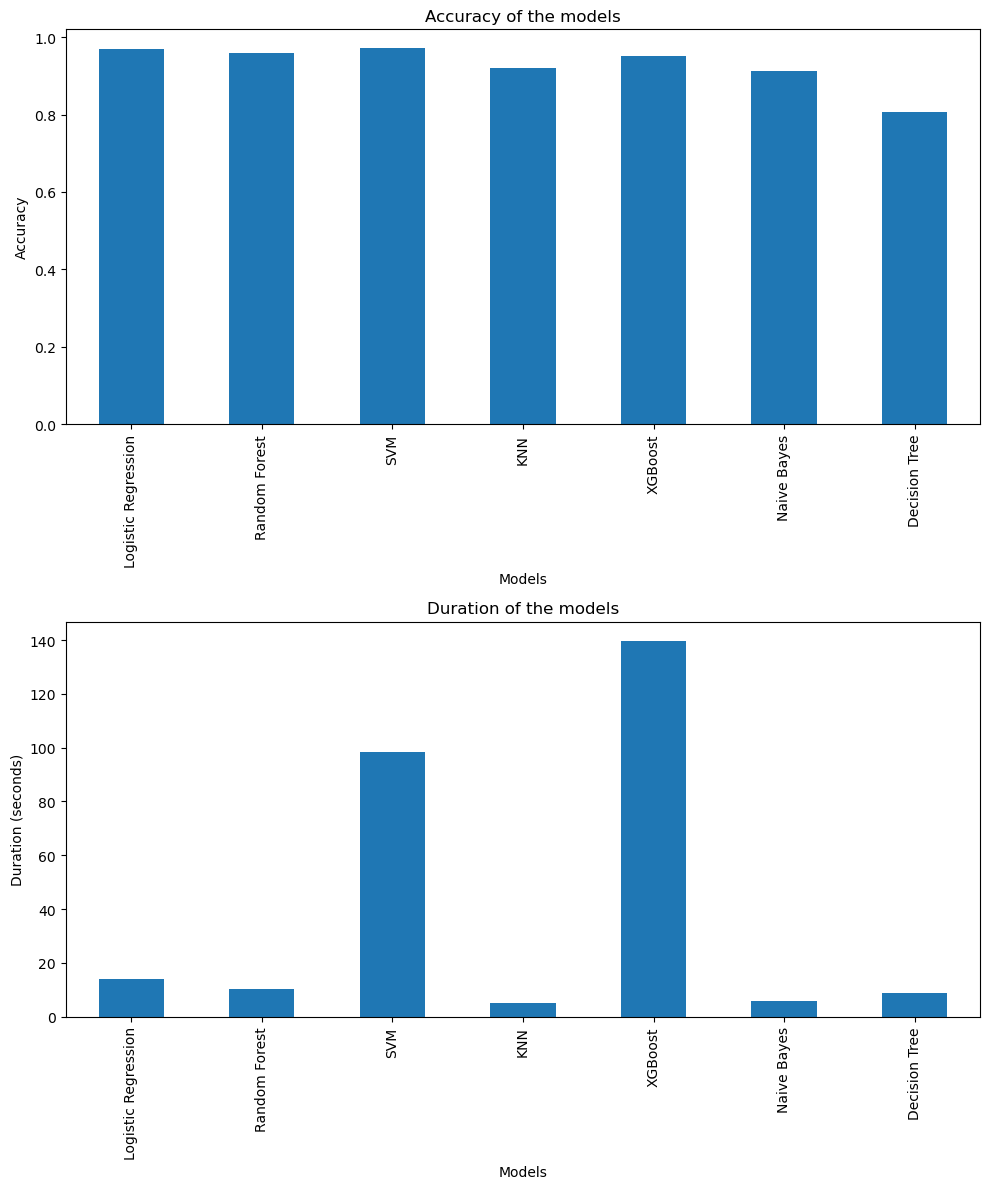

In [77]:
# Accuracy and Time of models in two plots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
results_df['Accuracy'].plot(kind='bar', ax=axes[0])
axes[0].set_title('Accuracy of the models')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Accuracy')
results_df['Duration'].plot(kind='bar', ax=axes[1])
axes[1].set_title('Duration of the models')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Duration (seconds)')
plt.tight_layout()
plt.show()
